In [15]:
import os
import pandas as pd
from urllib.parse import parse_qs
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [16]:
type_exp = ["placeholder", "randomExamples", "dynamic", "dynamicPlaceholder"]
# type_exp = ["dynamicPlaceholder"]
# benchmarks = ["libraries", "cedar", "dafnyVMC"]
benchmarks = ["libraries", "dafnyVMC"]
# Initialize an array to store the cumulative successes for all indices
successes_data = {}
overall_data = {}
for benchmark in benchmarks:
    for method in type_exp:
        df = pd.DataFrame()
        for i in range(58):
            print(
                f"Reading file {i}: ../results_llm/tmp_{benchmark}/output_{method}-r3_{benchmark}_{i}.csv"
            )
            if os.path.exists(
                # f"../results_llm/tmp_{benchmark}/output_{method}_{benchmark}_{i}.csv"
                f"../results_llm/tmp_{benchmark}/output_{method}-r3_{benchmark}_{i}.csv"
            ):
                df_temp = pd.read_csv(
                    f"../results_llm/tmp_{benchmark}/output_{method}-r3_{benchmark}_{i}.csv"
                )
                df_temp["Index"] = i
                df = pd.concat([df, df_temp], ignore_index=True)
        print(df.shape)
        overall_data[(method, benchmark)] = df

        cumulative_successes = [0 * 10]
        # Iterate over the range of tries
        for try_number in range(10):
            # Get the successes for the current try and all previous tries
            print(f"benchmark: {benchmark}, method: {method}, try: {try_number}")
            successes = df[
                (df["New Method Result"] == "Correct") & (df["Try"] <= try_number)
            ]
            # Count the number of unique indices that were successful
            cumulative_successes.append(successes["Index"].nunique())

            successes_data[(method, benchmark)] = cumulative_successes

normalized_cumulative_success = {}

total_successes = {}
total_task = 0
seen = []
for (method, benchmark), cumulative_successes in successes_data.items():
    # Normalize the cumulative successes
    total_indices = overall_data[(method, benchmark)]["Index"].nunique()
    print(total_indices)
    normalized_cumulative_success[(method, benchmark)] = [
        100.0 * successes / total_indices for successes in cumulative_successes
    ]
    if benchmark not in seen:
        total_task += total_indices
        seen.append(benchmark)
    if method not in total_successes:
        total_successes[method] = cumulative_successes
    else:
        total_successes[method] = [
            x + y for x, y in zip(total_successes[method], cumulative_successes)
        ]
    print(
        f"normalized_cumulative_success[{method}, {benchmark}] = {normalized_cumulative_success[(method, benchmark)]}"
    )


print(total_successes)
print(total_task)
for method in total_successes:
    total_successes[method] = [100.0 * x / total_task for x in total_successes[method]]
print(total_successes)

Reading file 0: ../results_llm/tmp_libraries/output_placeholder-r3_libraries_0.csv
Reading file 1: ../results_llm/tmp_libraries/output_placeholder-r3_libraries_1.csv
Reading file 2: ../results_llm/tmp_libraries/output_placeholder-r3_libraries_2.csv
Reading file 3: ../results_llm/tmp_libraries/output_placeholder-r3_libraries_3.csv
Reading file 4: ../results_llm/tmp_libraries/output_placeholder-r3_libraries_4.csv
Reading file 5: ../results_llm/tmp_libraries/output_placeholder-r3_libraries_5.csv
Reading file 6: ../results_llm/tmp_libraries/output_placeholder-r3_libraries_6.csv
Reading file 7: ../results_llm/tmp_libraries/output_placeholder-r3_libraries_7.csv
Reading file 8: ../results_llm/tmp_libraries/output_placeholder-r3_libraries_8.csv
Reading file 9: ../results_llm/tmp_libraries/output_placeholder-r3_libraries_9.csv


/tmp/ipykernel_830636/1088210734.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, df_temp], ignore_index=True)
/tmp/ipykernel_830636/1088210734.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, df_temp], ignore_index=True)
/tmp/ipykernel_830636/1088210734.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining t

Reading file 10: ../results_llm/tmp_libraries/output_placeholder-r3_libraries_10.csv
Reading file 11: ../results_llm/tmp_libraries/output_placeholder-r3_libraries_11.csv
Reading file 12: ../results_llm/tmp_libraries/output_placeholder-r3_libraries_12.csv
Reading file 13: ../results_llm/tmp_libraries/output_placeholder-r3_libraries_13.csv
Reading file 14: ../results_llm/tmp_libraries/output_placeholder-r3_libraries_14.csv
Reading file 15: ../results_llm/tmp_libraries/output_placeholder-r3_libraries_15.csv
Reading file 16: ../results_llm/tmp_libraries/output_placeholder-r3_libraries_16.csv
Reading file 17: ../results_llm/tmp_libraries/output_placeholder-r3_libraries_17.csv
Reading file 18: ../results_llm/tmp_libraries/output_placeholder-r3_libraries_18.csv
Reading file 19: ../results_llm/tmp_libraries/output_placeholder-r3_libraries_19.csv
Reading file 20: ../results_llm/tmp_libraries/output_placeholder-r3_libraries_20.csv
Reading file 21: ../results_llm/tmp_libraries/output_placeholder-

/tmp/ipykernel_830636/1088210734.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, df_temp], ignore_index=True)
/tmp/ipykernel_830636/1088210734.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, df_temp], ignore_index=True)
/tmp/ipykernel_830636/1088210734.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining t

Reading file 33: ../results_llm/tmp_libraries/output_placeholder-r3_libraries_33.csv
Reading file 34: ../results_llm/tmp_libraries/output_placeholder-r3_libraries_34.csv
Reading file 35: ../results_llm/tmp_libraries/output_placeholder-r3_libraries_35.csv
Reading file 36: ../results_llm/tmp_libraries/output_placeholder-r3_libraries_36.csv
Reading file 37: ../results_llm/tmp_libraries/output_placeholder-r3_libraries_37.csv
Reading file 38: ../results_llm/tmp_libraries/output_placeholder-r3_libraries_38.csv
Reading file 39: ../results_llm/tmp_libraries/output_placeholder-r3_libraries_39.csv
Reading file 40: ../results_llm/tmp_libraries/output_placeholder-r3_libraries_40.csv
Reading file 41: ../results_llm/tmp_libraries/output_placeholder-r3_libraries_41.csv
Reading file 42: ../results_llm/tmp_libraries/output_placeholder-r3_libraries_42.csv
Reading file 43: ../results_llm/tmp_libraries/output_placeholder-r3_libraries_43.csv
Reading file 44: ../results_llm/tmp_libraries/output_placeholder-

/tmp/ipykernel_830636/1088210734.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, df_temp], ignore_index=True)
/tmp/ipykernel_830636/1088210734.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, df_temp], ignore_index=True)
/tmp/ipykernel_830636/1088210734.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining t

Reading file 24: ../results_llm/tmp_libraries/output_randomExamples-r3_libraries_24.csv
Reading file 25: ../results_llm/tmp_libraries/output_randomExamples-r3_libraries_25.csv
Reading file 26: ../results_llm/tmp_libraries/output_randomExamples-r3_libraries_26.csv
Reading file 27: ../results_llm/tmp_libraries/output_randomExamples-r3_libraries_27.csv
Reading file 28: ../results_llm/tmp_libraries/output_randomExamples-r3_libraries_28.csv
Reading file 29: ../results_llm/tmp_libraries/output_randomExamples-r3_libraries_29.csv
Reading file 30: ../results_llm/tmp_libraries/output_randomExamples-r3_libraries_30.csv
Reading file 31: ../results_llm/tmp_libraries/output_randomExamples-r3_libraries_31.csv
Reading file 32: ../results_llm/tmp_libraries/output_randomExamples-r3_libraries_32.csv
Reading file 33: ../results_llm/tmp_libraries/output_randomExamples-r3_libraries_33.csv
Reading file 34: ../results_llm/tmp_libraries/output_randomExamples-r3_libraries_34.csv
Reading file 35: ../results_llm/

/tmp/ipykernel_830636/1088210734.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, df_temp], ignore_index=True)
/tmp/ipykernel_830636/1088210734.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, df_temp], ignore_index=True)
/tmp/ipykernel_830636/1088210734.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining t

Reading file 43: ../results_llm/tmp_libraries/output_randomExamples-r3_libraries_43.csv
Reading file 44: ../results_llm/tmp_libraries/output_randomExamples-r3_libraries_44.csv
Reading file 45: ../results_llm/tmp_libraries/output_randomExamples-r3_libraries_45.csv
Reading file 46: ../results_llm/tmp_libraries/output_randomExamples-r3_libraries_46.csv
Reading file 47: ../results_llm/tmp_libraries/output_randomExamples-r3_libraries_47.csv
Reading file 48: ../results_llm/tmp_libraries/output_randomExamples-r3_libraries_48.csv
Reading file 49: ../results_llm/tmp_libraries/output_randomExamples-r3_libraries_49.csv
Reading file 50: ../results_llm/tmp_libraries/output_randomExamples-r3_libraries_50.csv
Reading file 51: ../results_llm/tmp_libraries/output_randomExamples-r3_libraries_51.csv
Reading file 52: ../results_llm/tmp_libraries/output_randomExamples-r3_libraries_52.csv
Reading file 53: ../results_llm/tmp_libraries/output_randomExamples-r3_libraries_53.csv
Reading file 54: ../results_llm/

/tmp/ipykernel_830636/1088210734.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, df_temp], ignore_index=True)


Reading file 35: ../results_llm/tmp_libraries/output_dynamic-r3_libraries_35.csv
Reading file 36: ../results_llm/tmp_libraries/output_dynamic-r3_libraries_36.csv
Reading file 37: ../results_llm/tmp_libraries/output_dynamic-r3_libraries_37.csv
Reading file 38: ../results_llm/tmp_libraries/output_dynamic-r3_libraries_38.csv
Reading file 39: ../results_llm/tmp_libraries/output_dynamic-r3_libraries_39.csv
Reading file 40: ../results_llm/tmp_libraries/output_dynamic-r3_libraries_40.csv
Reading file 41: ../results_llm/tmp_libraries/output_dynamic-r3_libraries_41.csv
Reading file 42: ../results_llm/tmp_libraries/output_dynamic-r3_libraries_42.csv
Reading file 43: ../results_llm/tmp_libraries/output_dynamic-r3_libraries_43.csv
Reading file 44: ../results_llm/tmp_libraries/output_dynamic-r3_libraries_44.csv
Reading file 45: ../results_llm/tmp_libraries/output_dynamic-r3_libraries_45.csv
Reading file 46: ../results_llm/tmp_libraries/output_dynamic-r3_libraries_46.csv
Reading file 47: ../results_

/tmp/ipykernel_830636/1088210734.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, df_temp], ignore_index=True)
/tmp/ipykernel_830636/1088210734.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, df_temp], ignore_index=True)
/tmp/ipykernel_830636/1088210734.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining t

Reading file 29: ../results_llm/tmp_libraries/output_dynamicPlaceholder-r3_libraries_29.csv
Reading file 30: ../results_llm/tmp_libraries/output_dynamicPlaceholder-r3_libraries_30.csv
Reading file 31: ../results_llm/tmp_libraries/output_dynamicPlaceholder-r3_libraries_31.csv
Reading file 32: ../results_llm/tmp_libraries/output_dynamicPlaceholder-r3_libraries_32.csv
Reading file 33: ../results_llm/tmp_libraries/output_dynamicPlaceholder-r3_libraries_33.csv
Reading file 34: ../results_llm/tmp_libraries/output_dynamicPlaceholder-r3_libraries_34.csv
Reading file 35: ../results_llm/tmp_libraries/output_dynamicPlaceholder-r3_libraries_35.csv
Reading file 36: ../results_llm/tmp_libraries/output_dynamicPlaceholder-r3_libraries_36.csv
Reading file 37: ../results_llm/tmp_libraries/output_dynamicPlaceholder-r3_libraries_37.csv
Reading file 38: ../results_llm/tmp_libraries/output_dynamicPlaceholder-r3_libraries_38.csv
Reading file 39: ../results_llm/tmp_libraries/output_dynamicPlaceholder-r3_libra

/tmp/ipykernel_830636/1088210734.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, df_temp], ignore_index=True)
/tmp/ipykernel_830636/1088210734.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, df_temp], ignore_index=True)
/tmp/ipykernel_830636/1088210734.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining t

Reading file 8: ../results_llm/tmp_dafnyVMC/output_placeholder-r3_dafnyVMC_8.csv
Reading file 9: ../results_llm/tmp_dafnyVMC/output_placeholder-r3_dafnyVMC_9.csv
Reading file 10: ../results_llm/tmp_dafnyVMC/output_placeholder-r3_dafnyVMC_10.csv
Reading file 11: ../results_llm/tmp_dafnyVMC/output_placeholder-r3_dafnyVMC_11.csv
Reading file 12: ../results_llm/tmp_dafnyVMC/output_placeholder-r3_dafnyVMC_12.csv
Reading file 13: ../results_llm/tmp_dafnyVMC/output_placeholder-r3_dafnyVMC_13.csv
Reading file 14: ../results_llm/tmp_dafnyVMC/output_placeholder-r3_dafnyVMC_14.csv
Reading file 15: ../results_llm/tmp_dafnyVMC/output_placeholder-r3_dafnyVMC_15.csv
Reading file 16: ../results_llm/tmp_dafnyVMC/output_placeholder-r3_dafnyVMC_16.csv
Reading file 17: ../results_llm/tmp_dafnyVMC/output_placeholder-r3_dafnyVMC_17.csv
Reading file 18: ../results_llm/tmp_dafnyVMC/output_placeholder-r3_dafnyVMC_18.csv
Reading file 19: ../results_llm/tmp_dafnyVMC/output_placeholder-r3_dafnyVMC_19.csv
Reading 

/tmp/ipykernel_830636/1088210734.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, df_temp], ignore_index=True)
/tmp/ipykernel_830636/1088210734.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, df_temp], ignore_index=True)
/tmp/ipykernel_830636/1088210734.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining t

Reading file 14: ../results_llm/tmp_dafnyVMC/output_randomExamples-r3_dafnyVMC_14.csv
Reading file 15: ../results_llm/tmp_dafnyVMC/output_randomExamples-r3_dafnyVMC_15.csv
Reading file 16: ../results_llm/tmp_dafnyVMC/output_randomExamples-r3_dafnyVMC_16.csv
Reading file 17: ../results_llm/tmp_dafnyVMC/output_randomExamples-r3_dafnyVMC_17.csv
Reading file 18: ../results_llm/tmp_dafnyVMC/output_randomExamples-r3_dafnyVMC_18.csv
Reading file 19: ../results_llm/tmp_dafnyVMC/output_randomExamples-r3_dafnyVMC_19.csv
Reading file 20: ../results_llm/tmp_dafnyVMC/output_randomExamples-r3_dafnyVMC_20.csv
Reading file 21: ../results_llm/tmp_dafnyVMC/output_randomExamples-r3_dafnyVMC_21.csv
Reading file 22: ../results_llm/tmp_dafnyVMC/output_randomExamples-r3_dafnyVMC_22.csv
Reading file 23: ../results_llm/tmp_dafnyVMC/output_randomExamples-r3_dafnyVMC_23.csv
Reading file 24: ../results_llm/tmp_dafnyVMC/output_randomExamples-r3_dafnyVMC_24.csv
Reading file 25: ../results_llm/tmp_dafnyVMC/output_ra

/tmp/ipykernel_830636/1088210734.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, df_temp], ignore_index=True)
/tmp/ipykernel_830636/1088210734.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, df_temp], ignore_index=True)
/tmp/ipykernel_830636/1088210734.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining t

In [17]:
print(normalized_cumulative_success)

{('placeholder', 'libraries'): [0.0, 0.0, 40.0, 48.0, 52.0, 52.0, 52.0, 52.0, 52.0, 54.0, 54.0], ('randomExamples', 'libraries'): [0.0, 0.0, 46.0, 48.0, 52.0, 54.0, 58.0, 60.0, 60.0, 60.0, 62.0], ('dynamic', 'libraries'): [0.0, 0.0, 31.57894736842105, 42.10526315789474, 42.10526315789474, 45.6140350877193, 47.36842105263158, 49.12280701754386, 50.87719298245614, 52.63157894736842, 52.63157894736842], ('dynamicPlaceholder', 'libraries'): [0.0, 0.0, 52.0, 54.0, 56.0, 62.0, 66.0, 66.0, 66.0, 66.0, 66.0], ('placeholder', 'dafnyVMC'): [0.0, 0.0, 20.833333333333332, 37.5, 45.833333333333336, 50.0, 54.166666666666664, 54.166666666666664, 54.166666666666664, 58.333333333333336, 58.333333333333336], ('randomExamples', 'dafnyVMC'): [0.0, 0.0, 54.166666666666664, 62.5, 62.5, 62.5, 62.5, 62.5, 62.5, 62.5, 62.5], ('dynamic', 'dafnyVMC'): [0.0, 0.0, 21.21212121212121, 27.272727272727273, 27.272727272727273, 27.272727272727273, 33.333333333333336, 33.333333333333336, 36.36363636363637, 36.36363636363

{'dynamic': 'c', 'placeholder': 'g', 'randomExamples': 'm', 'dynamicPlaceholder': 'y'}


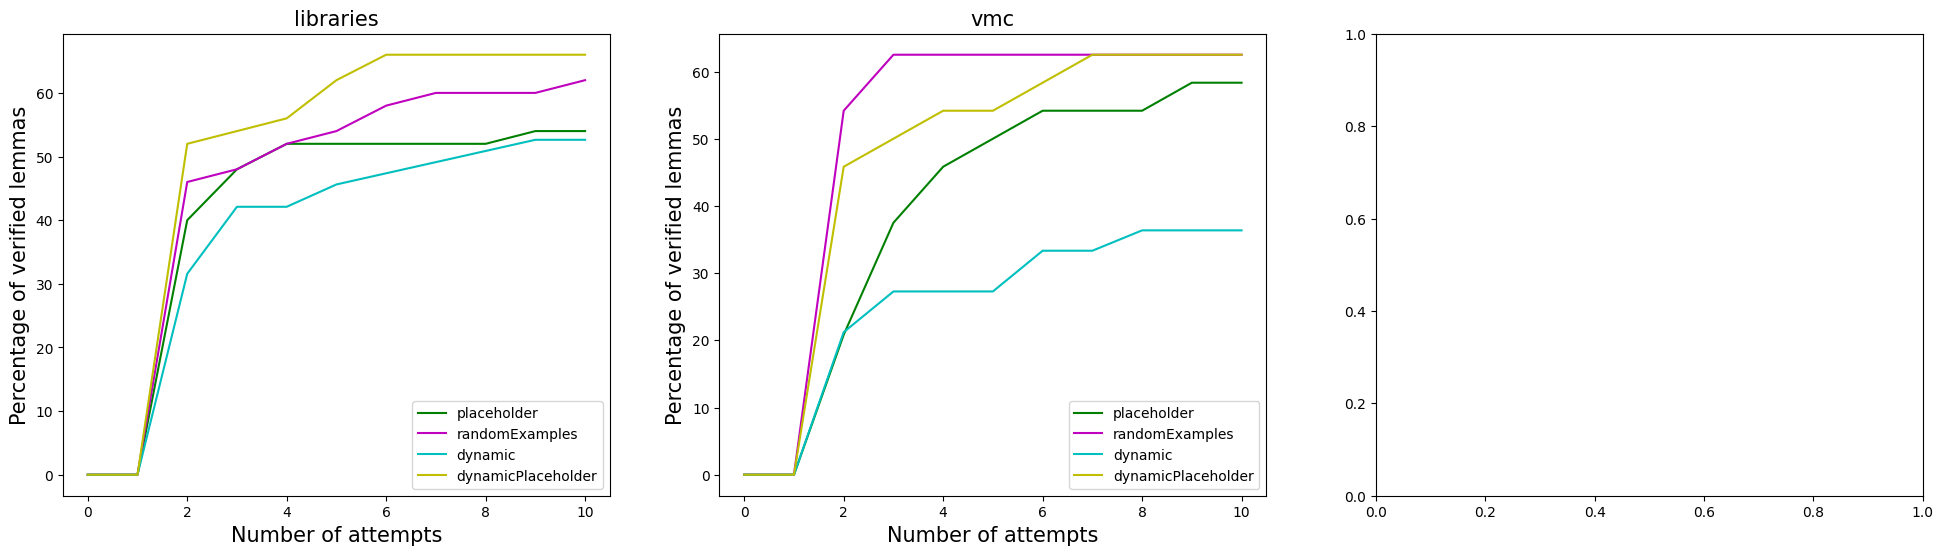

In [18]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(24, 6))
colors = ["c", "g", "m", "y", "k", "r"]
color_map = {
    method: colors[i % len(colors)]
    for i, method in enumerate(
        ["dynamic", "placeholder", "randomExamples", "dynamicPlaceholder"]
    )
}
print(color_map)
i = 0
for benchmark in benchmarks:
    # axs[i](figsize=(10, 6))
    for method in type_exp:
        data = normalized_cumulative_success[(method, benchmark)]
        method_name = method
        if method == "randomExample":
            method_name = "random"
        if method == "dynamic-r2":
            method_name = "similarity"
        axs[i].plot(data, label=method_name, color=color_map[method])
        benchmark_name = benchmark
        if benchmark == "dafnyVMC":
            benchmark_name = "vmc"
        axs[i].set_title(f"{benchmark_name}", fontsize=15)
        axs[i].set_xlabel("Number of attempts", fontsize=15)
        axs[i].legend(loc="lower right", fontsize=10)
        axs[i].set_ylabel("Percentage of verified lemmas", fontsize=15)
        # axs[i].legend()
    i += 1
plt.savefig("../fig/benchs_similarity.pdf", bbox_inches="tight")
plt.show()
# plt.figure(figsize=(10, 6))
# normalized_cumulative_success_lib = normalized_cumulative_success
# for (method, benchmark), cumulative_successes in normalized_cumulative_success.items():
#   data = normalized_cumulative_success[(method, "kfold")]
#   plt.plot(data, label=method)
# plt.title(f'Normalized Cumulative Success for {benchmark}')
# plt.xlabel('Index')
# plt.ylabel('Normalized Cumulative Success (%)')
# plt.legend()
# plt.show()

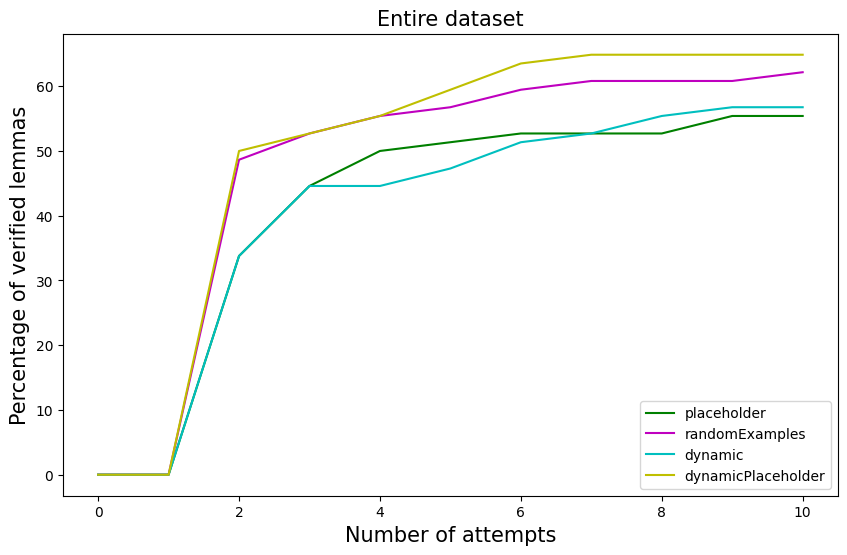

In [19]:
plt.figure(figsize=(10, 6))
for method, data in total_successes.items():
    method_name = method
    if method == "randomExample":
        method_name = "random"
    if method == "dynamic-r2":
        method_name = "similarity"
    plt.plot(data, label=method_name, color=color_map[method])
    plt.title(f"Entire dataset", fontsize=15)
    plt.xlabel("Number of attempts", fontsize=15)
    plt.ylabel("Percentage of verified lemmas", fontsize=15)
    plt.legend(loc="lower right", fontsize=10)
plt.savefig("../fig/entire_similarity.pdf", bbox_inches="tight")

plt.show()

In [20]:
type_exp = ["dynamic", "dynamic-r3", "static", "placeholder", "randomExample"]

# Initialize an array to store the cumulative successes for all indices
successes_data = {}
for method in type_exp:
    df = pd.DataFrame()
    for i in range(53):
        if os.path.exists(f"../results_llm/tmp_cedar/output_{method}_cedar_{i}.csv"):
            # print(f"Reading file {i}")
            df_temp = pd.read_csv(
                f"../results_llm/tmp_cedar/output_{method}_cedar_{i}.csv"
            )
            df_temp["Index"] = i
            df = pd.concat([df, df_temp], ignore_index=True)
    print(df.shape)

    cumulative_successes = [0 * 10]
    # Iterate over the range of tries
    for try_number in range(10):
        # Get the successes for the current try and all previous tries
        successes = df[
            (df["New Method Result"] == "Correct") & (df["Try"] <= try_number)
        ]
        # Count the number of unique indices that were successful
        cumulative_successes.append(successes["Index"].nunique())

        successes_data[(method, "kfold")] = cumulative_successes

normalized_cumulative_success = {}

for (method, benchmark), cumulative_successes in successes_data.items():
    # Normalize the cumulative successes
    total_indices = df["Index"].nunique()
    if method == "randomExamples":
        normalized_cumulative_success[("randomExample", benchmark)] = [
            100.0 * successes / total_indices for successes in cumulative_successes
        ]
    else:
        normalized_cumulative_success[(method, benchmark)] = [
            100.0 * successes / total_indices for successes in cumulative_successes
        ]

(332, 24)
(104, 26)
(343, 24)
(407, 24)
(343, 24)


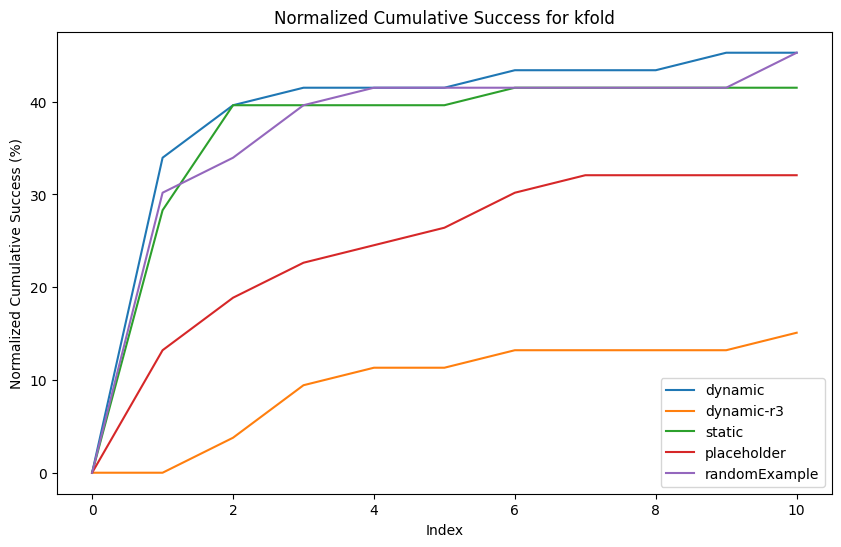

In [21]:
plt.figure(figsize=(10, 6))
normalized_cumulative_success_cedar = normalized_cumulative_success
for (method, benchmark), cumulative_successes in normalized_cumulative_success.items():
    data = normalized_cumulative_success[(method, "kfold")]
    plt.plot(data, label=method)
plt.title(f"Normalized Cumulative Success for {benchmark}")
plt.xlabel("Index")
plt.ylabel("Normalized Cumulative Success (%)")
plt.legend()
plt.show()

In [22]:
type_exp = ["dynamic", "dynamic-r2", "static", "placeholder", "randomExample"]

# Initialize an array to store the cumulative successes for all indices
successes_data = {}
for method in type_exp:
    df = pd.DataFrame()
    for i in range(58):
        if os.path.exists(
            f"../results_llm/tmp_dafnyVMC/output_{method}_dafnyVMC_{i}.csv"
        ):
            # print(f"Reading file {i}")
            df_temp = pd.read_csv(
                f"../results_llm/tmp_dafnyVMC/output_{method}_dafnyVMC_{i}.csv"
            )
            df_temp["Index"] = i
            df = pd.concat([df, df_temp], ignore_index=True)
    print(method)
    print(df.shape)

    cumulative_successes = [0 * 10]
    # Iterate over the range of tries
    for try_number in range(10):
        # Get the successes for the current try and all previous tries
        successes = df[
            (df["New Method Result"] == "Correct") & (df["Try"] <= try_number)
        ]
        # Count the number of unique indices that were successful
        cumulative_successes.append(successes["Index"].nunique())

        successes_data[(method, "kfold")] = cumulative_successes

normalized_cumulative_success = {}

for (method, benchmark), cumulative_successes in successes_data.items():
    # Normalize the cumulative successes
    total_indices = df["Index"].nunique()
    normalized_cumulative_success[(method, benchmark)] = [
        100.0 * successes / total_indices for successes in cumulative_successes
    ]

dynamic
(206, 24)
dynamic-r2
(195, 24)
static
(200, 24)
placeholder
(268, 24)
randomExample
(0, 0)


KeyError: 'New Method Result'

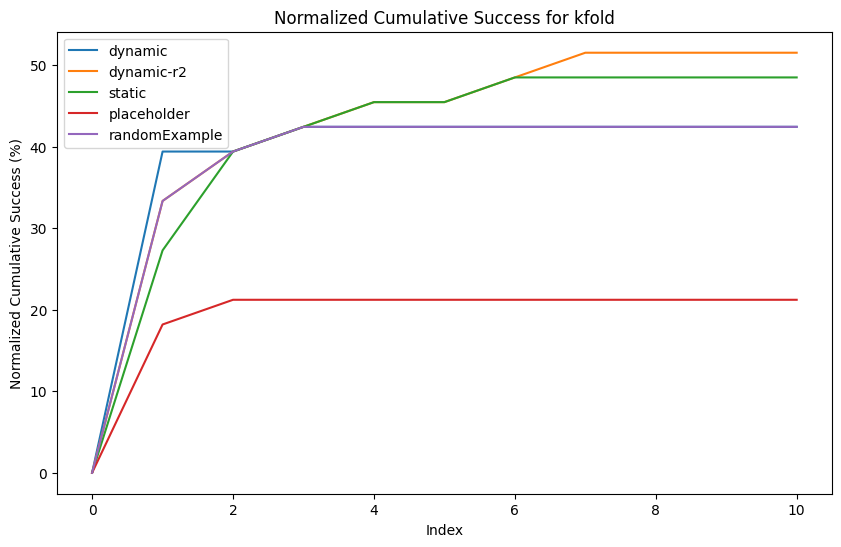

In [ ]:
plt.figure(figsize=(10, 6))
normalized_cumulative_success_dafnyVMC = normalized_cumulative_success
for (method, benchmark), cumulative_successes in normalized_cumulative_success.items():
    data = normalized_cumulative_success[(method, "kfold")]
    plt.plot(data, label=method)
plt.title(f"Normalized Cumulative Success for {benchmark}")
plt.xlabel("Index")
plt.ylabel("Normalized Cumulative Success (%)")
plt.legend()
plt.show()

In [ ]:
total_normalized_cumulative_success = {}
for (
    method,
    benchmark,
), cumulative_successes in normalized_cumulative_success_cedar.items():
    # compute the mean over the 3 benchmarks
    total_normalized_cumulative_success[method] = [
        (
            normalized_cumulative_success_lib[(method, "kfold")][i]
            + normalized_cumulative_success_cedar[(method, "kfold")][i]
            + normalized_cumulative_success_dafnyVMC[(method, "kfold")][i]
        )
        / 3
        for i in range(11)
    ]
print(total_normalized_cumulative_success)

{'dynamic': [0.0, 34.76874003189793, 40.714159135211766, 45.26552070411719, 45.26552070411719, 45.26552070411719, 47.05239529800932, 47.05239529800932, 47.05239529800932, 47.66967924862661, 48.254474570264044], 'static': [0.0, 30.630870104554315, 39.544568491936914, 41.724260145312776, 42.73436115541379, 43.319156477051216, 44.94654143776952, 45.53133675940694, 46.70092740268179, 46.70092740268179, 47.285722724319214], 'placeholder': [0.0, 19.15352353948845, 26.109043652903306, 27.928406875775295, 28.545690826392576, 29.162974777009868, 31.567133321519282, 33.93880323704885, 33.93880323704885, 34.523598558686274, 34.523598558686274], 'randomExample': [0.0, 35.0227420402859, 39.44710260499734, 43.478646110225064, 44.68072538247977, 44.68072538247977, 44.68072538247977, 44.68072538247977, 44.68072538247977, 45.26552070411719, 47.084883926989185]}


[0.0, 34.76874003189793, 40.714159135211766, 45.26552070411719, 45.26552070411719, 45.26552070411719, 47.05239529800932, 47.05239529800932, 47.05239529800932, 47.66967924862661, 48.254474570264044]
[0.0, 30.630870104554315, 39.544568491936914, 41.724260145312776, 42.73436115541379, 43.319156477051216, 44.94654143776952, 45.53133675940694, 46.70092740268179, 46.70092740268179, 47.285722724319214]
[0.0, 19.15352353948845, 26.109043652903306, 27.928406875775295, 28.545690826392576, 29.162974777009868, 31.567133321519282, 33.93880323704885, 33.93880323704885, 34.523598558686274, 34.523598558686274]
[0.0, 35.0227420402859, 39.44710260499734, 43.478646110225064, 44.68072538247977, 44.68072538247977, 44.68072538247977, 44.68072538247977, 44.68072538247977, 45.26552070411719, 47.084883926989185]


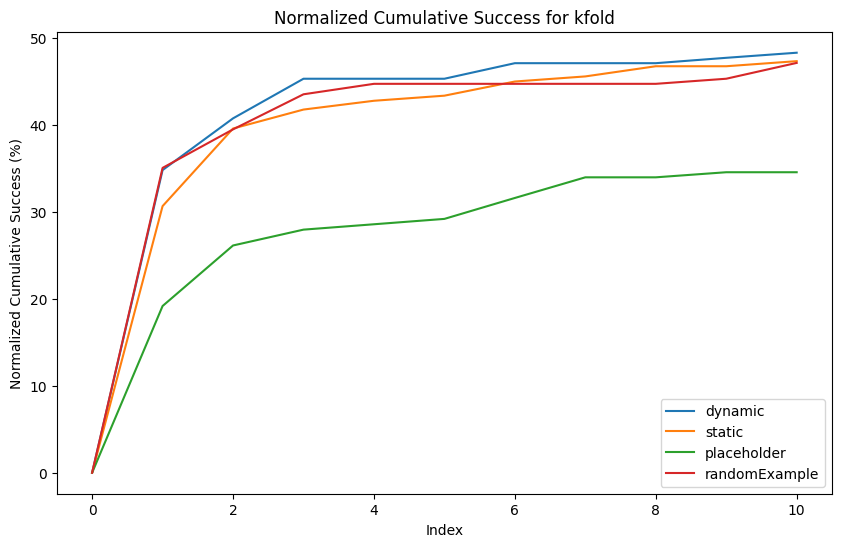

In [ ]:
plt.figure(figsize=(10, 6))
for method, cumulative_successes in total_normalized_cumulative_success.items():
    data = total_normalized_cumulative_success[method]
    print(data)
    plt.plot(data, label=method)
plt.title(f"Normalized Cumulative Success for {benchmark}")
plt.xlabel("Index")
plt.ylabel("Normalized Cumulative Success (%)")
plt.legend()
plt.show()